In [20]:
%cd segment-anything

[WinError 2] Le fichier spécifié est introuvable: 'segment-anything'
C:\Users\dell\Desktop\info\projet info\segment-anything


### On essai d'evaluer dans ce notebook si la complexite du reseau de neurones influent sur la segmantation.

### On utilise un reseau de neurones deja fait

In [21]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"


from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

CHECKPOINT_PATH = "./sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [33]:
mask_generator = SamAutomaticMaskGenerator(sam)
IMAGE_PATH = "./sample.tiff"

In [23]:
!pip install supervision

In [34]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

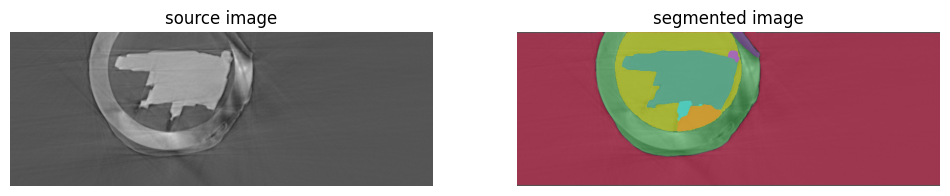

In [35]:
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

### Malgres sa complexite, le reseau de neurones a du mal a segmenter l'image. En plus de prendre beaucoup de temps (10 minutes par image)

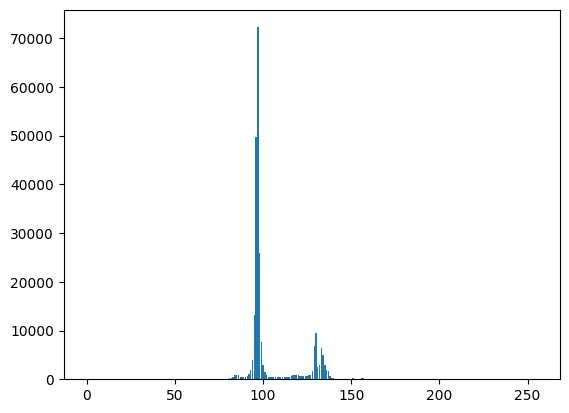

In [36]:
histogramme(np.sum(annotated_image,axis=2)//3)

In [14]:
%cd segment-anything

[WinError 2] Le fichier spécifié est introuvable: 'segment-anything'
C:\Users\dell\Desktop\info\projet info\segment-anything


In [15]:
def histogramme(img):
    histo=[0]*256
    for line in img:
        for pixel in line:
            histo[pixel]+=1
    plt.bar(range(256),histo)
    plt.show()
    
def histo(img):
    histo=[0]*256
    for line in img:
        for pixel in line:
            histo[pixel]+=1
    return np.array(histo)


In [16]:
import numpy as np
import cv2 
from PIL import Image
from matplotlib import pyplot as plt 


In [17]:
img_test=np.array(Image.open('sample.tiff').convert('L'))

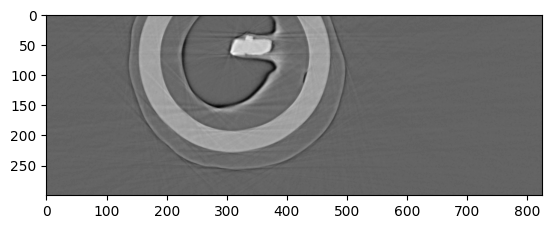

In [18]:
plt.imshow(img_test,cmap='gray')

Number of objects is 1


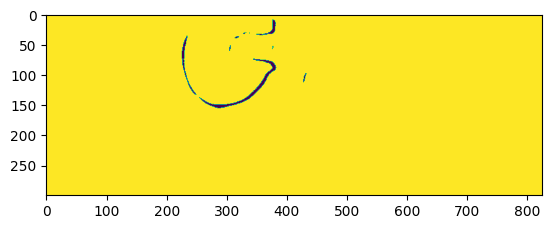

In [19]:
from scipy import ndimage

blur_radius = 0.001
threshold = 200


# smooth the image (to remove small objects)
imgf = ndimage.gaussian_filter(img_test, blur_radius)
threshold = 50

# find connected components
labeled, nr_objects = ndimage.label(imgf > threshold) 
print("Number of objects is {}".format(nr_objects))
# Number of objects is 4 

plt.imshow(labeled)

plt.show()